In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import statistics

load the model (you can start fom here if the model already exists)

In [3]:
%cd /home/miri-o/Documents/
import biovec
CDR3_cropped_model = biovec.models.load_protvec('CDR3_cropped_model')

/home/miri-o/Documents


load a file containing CDR3s and their bio-physical and bio-chemical properties:

In [5]:
file_with_propeties = pd.read_csv('CDR3_properties_HCV.csv')
file_with_propeties.head()
import re
file_with_propeties['CONDITION'] = [re.split('\d', condition)[0] for condition in file_with_propeties['SUBJECT']]
file_with_propeties['CONDITION'].head()
n = 5000
np.random.seed(1)
random_indexes = np.random.choice(range(len(file_with_propeties['JUNC_AA'])),n)
randvectors_word2vec = np.zeros((n,100))

index = 0
for i in random_indexes :
    word = file_with_propeties.loc[i, ('JUNC_AA')]
    randvectors_word2vec[index] = list(CDR3_cropped_model.to_vecs(word)[0])
    index+=1


#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)


NameError: name 'clustering' is not defined

In [7]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average', n_clusters=12)
clustering.fit(vec_embedded)
data = pd.DataFrame({'polarity':file_with_propeties['CDR3_AA_POLARITY'][random_indexes], 
                     'cluster':clustering.labels_,
                   'charge':file_with_propeties['CDR3_AA_CHARGE'][random_indexes],
                   'jun_len':file_with_propeties['JUNC_AA_LEN'][random_indexes],
                    'condition':file_with_propeties['CONDITION'][random_indexes],
                    'junction':[line[2:-1] for line in file_with_propeties['JUNC_AA'][random_indexes]]})

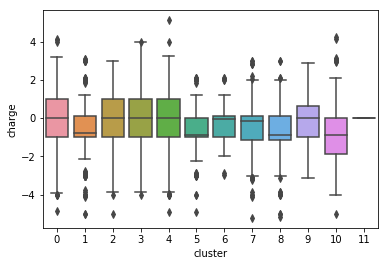

In [8]:

sns.boxplot(x = 'cluster', y = 'charge', data = data)
plt.show()

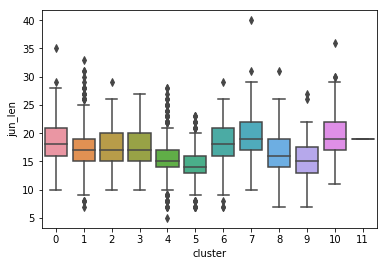

In [9]:

sns.boxplot(x = 'cluster', y = 'jun_len', data = data)
plt.show()

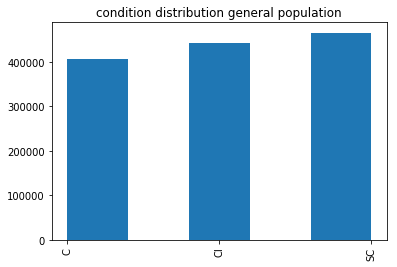

In [10]:
plt.hist(file_with_propeties['CONDITION'], bins = 5)
plt.xticks(rotation=90)
plt.title('condition distribution general population')
plt.show()

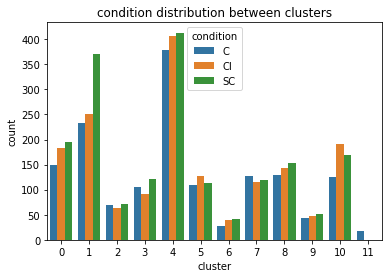

In [11]:
sns.countplot(x = 'cluster', hue = 'condition', data = data)
plt.title('condition distribution between clusters')
plt.show()

In [12]:
condition_dict = {'CI':1, 'SC':2, 'C':3}
plot_clustering(vec_embedded, [condition_dict[i] for i in data.condition], 'Condition distributions')


NameError: name 'plot_clustering' is not defined

In [ ]:
data[(data.cluster==7)]

In [ ]:
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
a = SeqRecord(Seq("AAA", generic_dna), id="Alpha")
b = SeqRecord(Seq("AAG", generic_dna), id="Beta")
c = SeqRecord(Seq("GAA", generic_dna), id="Gamma")
align = MultipleSeqAlignment([a,b,c], annotations={"tool": "demo"})
print(align)


In [ ]:

def plot_embedding_with_properties(X, prop, title=None):
    # normalize property
    #prop = [(c - min(prop))/(max(prop)-min(prop))*100 for c in prop]

    x = X[:,0]
    y = X[:,1]

    sc = plt.scatter(x, y, c=prop, s=3,cmap='plasma', alpha = .5)
    plt.colorbar(sc)
    plt.xlabel('tSNE component 1')
    plt.ylabel('tSNE component 2')

    if title is not None:
        plt.title(title)
    #plt.show()
    #plt.colorbar()

In [ ]:
import time.time
t0 = time()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_embedding_3D(X, prop,title=None):
    
    x = [X[i,0] for i in range(len(X))]
    y = [X[i,1] for i in range(len(X))]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, prop, c=prop)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()


In [ ]:
acid = file_with_propeties.loc[random_indexes, ('CDR3_AA_ACIDIC')]

basis = np.array([(c - min(charge))/(max(charge)-min(charge))*100 for c in basis])
plot_embedding_with_properties(vec_embedded, basis, title='CDR3 marked by basis')
CDR3_AA_ACIDIC

### Mapping all 3-grams 

In [13]:
# take 8000 3-grams and map them the same way
import itertools
n = 3
prot_ngrams = [list(n) for n in itertools.product('ACDEFGHIKLMNPQRSTVWY', repeat = n)]
prot_ngrams = [''.join(ngram) for ngram in prot_ngrams]


In [14]:
prot_ngram_vecs = {}
prot_ngram_vecs = prot_ngram_vecs.fromkeys(prot_ngrams, 0)

for ngram in prot_ngrams:
    try:
        prot_ngram_vecs[ngram] = list(CDR3_cropped_model.to_vecs(ngram)[0])
    except:
        print('Could not convert ngram: ', ngram) 
    

Could not convert ngram:  CIC
Could not convert ngram:  CKC
Could not convert ngram:  CMC
Could not convert ngram:  CMQ
Could not convert ngram:  CTC
Could not convert ngram:  MCI
Could not convert ngram:  MCK
Could not convert ngram:  MHK
Could not convert ngram:  QCM
Could not convert ngram:  QCQ
Could not convert ngram:  QMC
Could not convert ngram:  WMC


In [15]:
prot_ngram_vecs['CIC']
## TODO: remove the unsupported sequences from the data!!!

0

In [16]:
# ceate file for properties

# Open File
resultfile = open("prot_ngrams.csv",'w')
resultfile.write('N gram'+ "\n")
# Write data to file
for r in prot_ngrams:
    resultfile.write(r + "\n")
resultfile.close()

In [17]:
vector_space = np.zeros_like(file_with_propeties['JUNC_AA'])
index = 0
for word in file_with_propeties['JUNC_AA']:
    try:
        vector_space[index] = list(CDR3_cropped_model.to_vecs(word)[0])
    except:
        print('Unknown error', str(index))
        vector_space[index] = None
    index+=1    
            
    

Unknown error 25312
Unknown error 42811
Unknown error 42999
Unknown error 53871
Unknown error 55666
Unknown error 64849
Unknown error 92764
Unknown error 93478
Unknown error 102572
Unknown error 111314
Unknown error 117387
Unknown error 142192
Unknown error 161595
Unknown error 168130
Unknown error 171109
Unknown error 193952
Unknown error 198647
Unknown error 211001
Unknown error 220035
Unknown error 230156
Unknown error 238180
Unknown error 241349
Unknown error 249155
Unknown error 251888
Unknown error 254275
Unknown error 257522
Unknown error 258628
Unknown error 259443
Unknown error 259937
Unknown error 260526
Unknown error 286929
Unknown error 288657
Unknown error 301910
Unknown error 303795
Unknown error 310128
Unknown error 313095
Unknown error 323941
Unknown error 327349
Unknown error 328340
Unknown error 328859
Unknown error 340579
Unknown error 357643
Unknown error 367851
Unknown error 373499
Unknown error 379449
Unknown error 387888
Unknown error 396485
Unknown error 426243


In [19]:
prot_ngrams_df = pd.DataFrame(prot_ngram_vecs)
prot_ngrams_array = np.transpose(prot_ngrams_df.values)

In [20]:
vec_embedded_8000 = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(prot_ngrams_array)

In [21]:
prot_ngrams_df.columns[1]

'AAC'

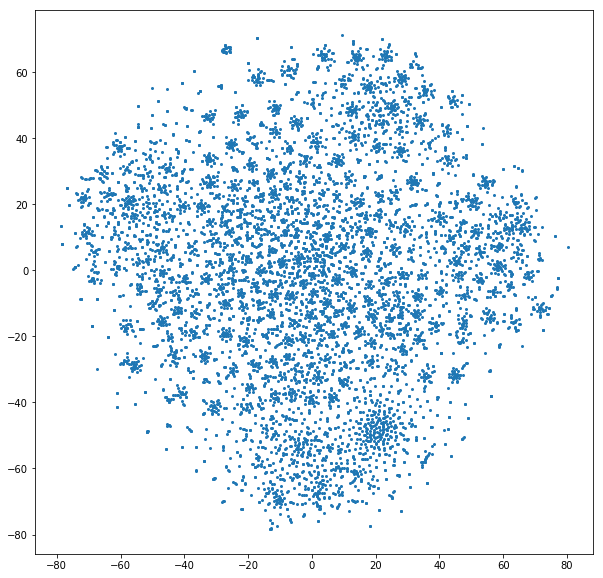

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(vec_embedded_8000[:,0], vec_embedded_8000[:,1], s=4)
plt.show()

In [ ]:
import codecs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mpld3
from sklearn.manifold import TSNE
from numpy import linalg as LA
%matplotlib inline
#mpld3.enable_notebook()



def visualize(X_embedded, words):

    # plot the words vectors with their labels
    mpl.rcParams['figure.figsize'] = (12,12)
    mpl.rcParams.update({'font.size': 10})
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    for word, x, y in zip(words, X_embedded[:,0], X_embedded[:,1]):
        plt.annotate(word, xy=(x, y), xytext=(x,y), textcoords="data")
    plt.show()
    

In [ ]:
%matplotlib notebook
import mpld3
visualize(vec_embedded_8000, prot_ngrams_df.columns)
#plt.scatter(range(100), range(100), s=2)
mpld3.disable_notebook()

In [ ]:
mpld3.disable_notebook()

In [ ]:
# read n-grams with properties (created by alakazm) to data frame
ngrams_properties = pd.read_csv("prot_ngrams_properties.csv")
ngrams_properties.head()

In [ ]:
%matplotlib inline
plt.figure(figsize=(14, 3.5))
plt.subplot(131)
plot_embedding_with_properties(vec_embedded_8000, ngrams_properties['CDR3_AA_CHARGE'].tolist(), title='Charge')
plt.subplot(132)
plot_embedding_with_properties(vec_embedded_8000, ngrams_properties['CDR3_AA_POLARITY'].tolist(), title='Polarity')
plt.subplot(133)
plot_embedding_with_properties(vec_embedded_8000, ngrams_properties['CDR3_AA_AROMATIC'].tolist(), title='Aromatic')

In [ ]:
plt.hist(ngrams_properties['CDR3_AA_POLARITY'], bins = 50)